If data point are more complex then we go for **Decision Tree**

Ref : 

https://www.skillbasics.com/courses/machine-learning-for-beginners/lecture/51

https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial/data

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial/notebook


Decision Tree is a used to solve classification problem or regression problem

Below kind of problem solved by the linear regression

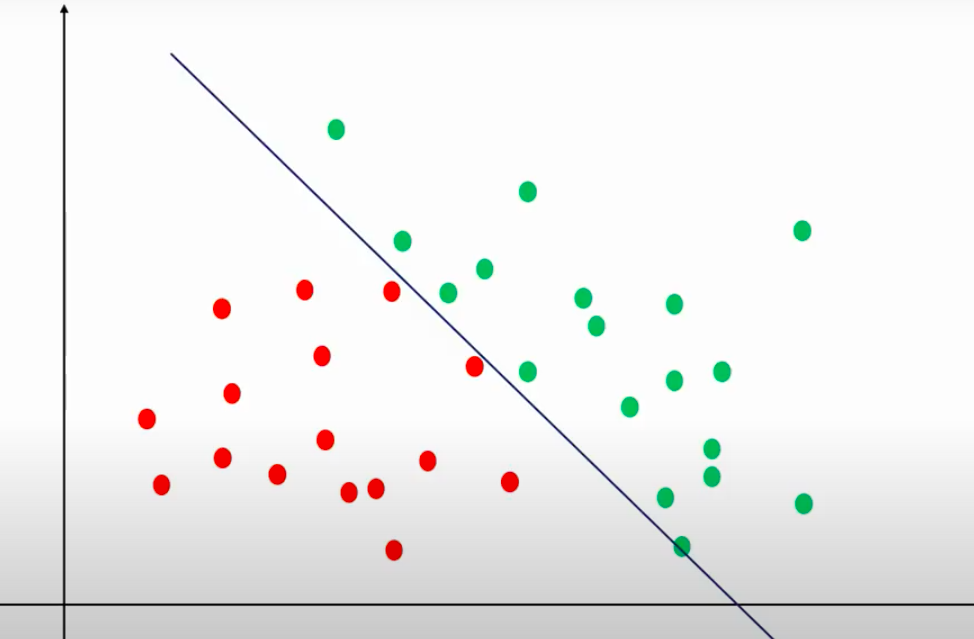

Below kind of problem solved by the decision tree. 

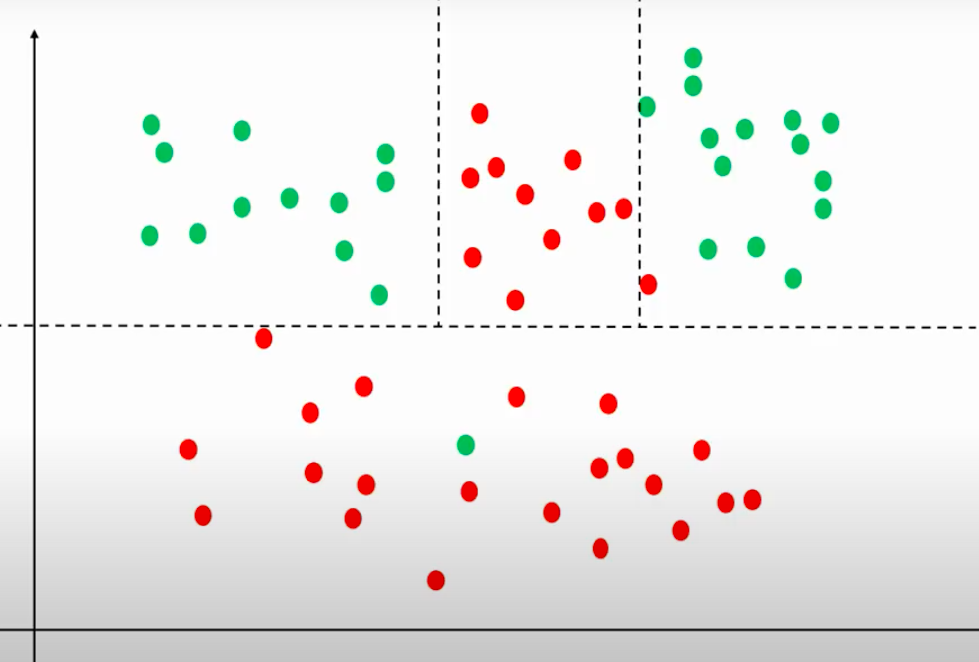

**Entropy** or **Gini Impurity** both used for the decision tree build is appropriate then the depth of the tree will be less.

The algorithm calculates the **entropy** or **Gini Impurity** of each feature after every split and as the splitting continues on, it selects the best feature and starts splitting according to it.

if we compare both the methods then **Gini Impurity is more efficient** than entropy in terms of computing power

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/laxmankusuma/Data-Science-series/main/Machine%20Learning/car_evaluation.csv",sep=',')
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [2]:
X = df.drop(['class'], axis=1)

y = df['class']

In [3]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [4]:
# import category encoders

import category_encoders as ce

In [5]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


# Decision Tree Classifier with criterion gini index

In [6]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [7]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [8]:
y_pred_gini = clf_gini.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


In [10]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [11]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7848


In [12]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053


# Decision Tree Classifier with criterion entropy

In [13]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [14]:
y_pred_en = clf_en.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8053


In [16]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      dtype=object)

In [17]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7848


In [18]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7848
Test set score: 0.8053
